In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_isopul_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Isopulegol
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
2,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
3,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49996,42968,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49997,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49998,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Isopulegol', 'index'], axis = 1)
y = df_knn[['X..Isopulegol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

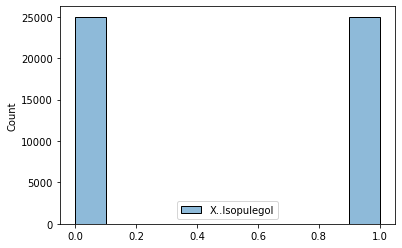

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.041940000000000005

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.029748

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1724760852988031

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9348366092956588

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8810059009440927

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([8.78251456e-02, 8.31572691e-02, 1.00307288e-01, 8.31066765e-02,
       8.29022394e-02, 2.96383268e-01, 0.00000000e+00, 0.00000000e+00,
       2.40216996e-05, 2.33200423e-03, 1.00676918e-02, 0.00000000e+00,
       5.38805320e-03, 3.22109238e-05, 4.42445745e-03, 4.62350439e-03,
       5.17419786e-03, 6.47336736e-03, 0.00000000e+00, 6.08673151e-03,
       0.00000000e+00, 0.00000000e+00, 5.13354232e-03, 7.96391910e-03,
       7.31418625e-03, 2.70878929e-03, 4.56644253e-03, 1.42412937e-05,
       0.00000000e+00, 2.42459738e-03, 1.04950894e-02, 0.00000000e+00,
       5.19003668e-03, 0.00000000e+00, 3.76056467e-06, 6.78089819e-03,
       3.97381392e-03, 4.24796021e-03, 1.84786520e-04, 2.22408286e-04,
       3.30424927e-04, 6.26842289e-03, 1.22299737e-04, 3.89910662e-03,
       3.09773603e-04, 1.31211352e-02, 1.17909610e-03, 2.41707322e-04,
       7.97740968e-03, 1.80819199e-04, 1.96420276e-02, 5.29130883e-03,
       1.23183901e-02, 1.12193293e-03, 6.58267239e-03, 1.46749022e-03,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,cheese,diesel,flowery,lemon,orange
0,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,0,0,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,0,0,0,0
2,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,0,0,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,0,0
4,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.360708,-0.269375,0.169135,0.099257,0.141142,0,0,0,0,0,0
49996,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,0,0,0,0,0
49997,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,0,0,0,0,0
49998,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'cheese',
 'diesel',
 'flowery',
 'lemon',
 'orange']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_isopul.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_isopul.pkl")

['selector_knn_lsa_elbow_isopul.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.039

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.027700000000000002

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1664331697709324

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9381241298705763

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8891991620686631

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.026906587798169176

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.14223670406761335

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9867148131770603

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.919074268063081

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_isopul.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_isopul.pkl")

['y_test_knreg_lsa_elbow_isopul.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.026993049272349804

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.020164174700891976

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.14200061514265344

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.9193270342996283

In [65]:
y_test

,X..Isopulegol
26247,1.0
35067,1.0
34590,1.0
16668,0.0
12196,0.0
...,...
49858,0.0
19849,0.0
46899,0.0
28256,1.0


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

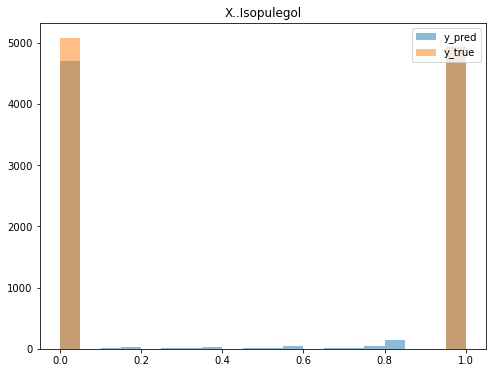

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Isopulegol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_isopul.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.960
P-value: 0.000


<AxesSubplot:>

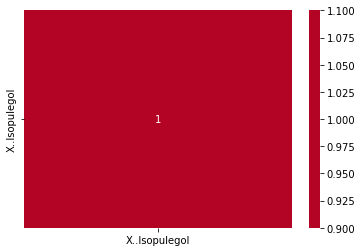

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)